In [ ]:
# Лабораторна робота №6
# ФБ-25 Голубєва Ірина

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

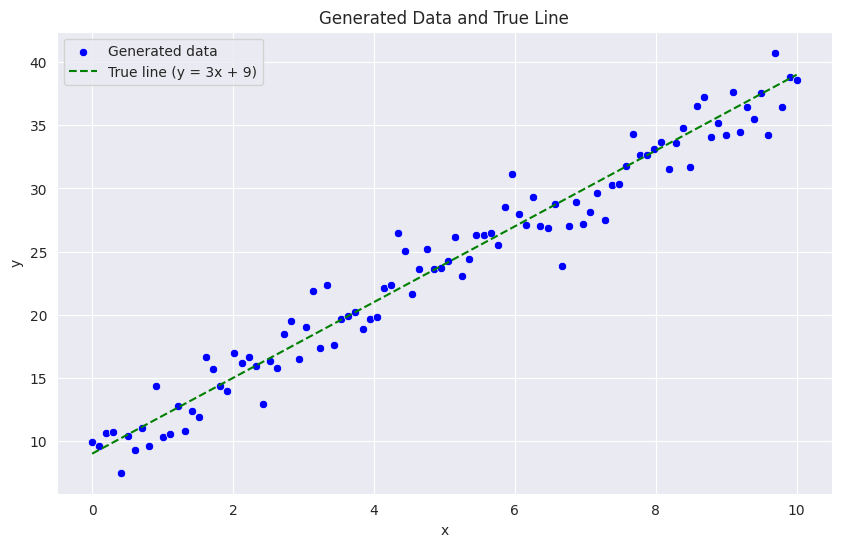

In [ ]:
k = 3
b = 9
n = 100

x = np.linspace(0, 10, n)
noise = np.random.normal(0, 2, n)
y = k * x + b + noise

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, label='Generated data', color='blue')
plt.plot(x, k * x + b, 'g--', label=f'True line (y = {k}x + {b})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data and True Line')
plt.legend()
plt.show()

In [ ]:
def least_squares_method(x, y):
    X = np.vstack([x, np.ones(len(x))]).T
    k_hat, b_hat = np.linalg.lstsq(X, y, rcond=None)[0]
    return k_hat, b_hat

k_estimated, b_estimated = least_squares_method(x, y)

k_polyfit, b_polyfit = np.polyfit(x, y, 1)

print(f"Original values: k = {k}, b = {b}")
print(f"Least Squares estimates: k = {k_estimated}, b = {b_estimated}")
print(f"Polyfit estimates: k = {k_polyfit}, b = {b_polyfit}")

Original values: k = 3, b = 9
Least Squares estimates: k = 2.9309130087821655, b = 9.220814961454238
Polyfit estimates: k = 2.930913008782167, b = 9.220814961454234


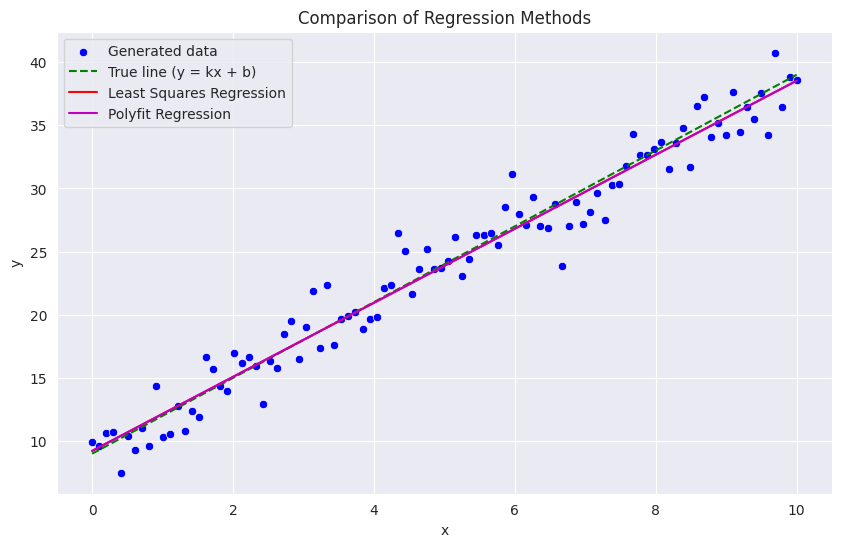

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(x=x, y=y, label='Generated data', color='blue')

plt.plot(x, k * x + b, 'g--', label='True line (y = kx + b)')

plt.plot(x, k_estimated * x + b_estimated, 'r-', label='Least Squares Regression')

plt.plot(x, k_polyfit * x + b_polyfit, 'm-', label='Polyfit Regression')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.show()

In [ ]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000, tol=1e-6):
    k_hat = 0
    b_hat = 0
    n = len(x)
    error_history = []

    for i in range(n_iter):
        y_pred = k_hat * x + b_hat
        error = np.mean((y - y_pred) ** 2)
        error_history.append(error)

        d_k = (-2/n) * np.sum(x * (y - y_pred))
        d_b = (-2/n) * np.sum(y - y_pred)

        k_hat_old, b_hat_old = k_hat, b_hat

        k_hat -= learning_rate * d_k
        b_hat -= learning_rate * d_b

        if np.abs(k_hat - k_hat_old) < tol and np.abs(b_hat - b_hat_old) < tol:
            print(f"Stopped at iteration {i}")
            break

    return k_hat, b_hat, error_history

k_hat, b_hat, errors = gradient_descent(x, y)

print("Estimated parameters using gradient descent:")
print(f"k_hat = {k_hat:.2f}, b_hat = {b_hat:.2f}")

Estimated parameters using gradient descent:
k_hat = 2.94, b_hat = 9.16


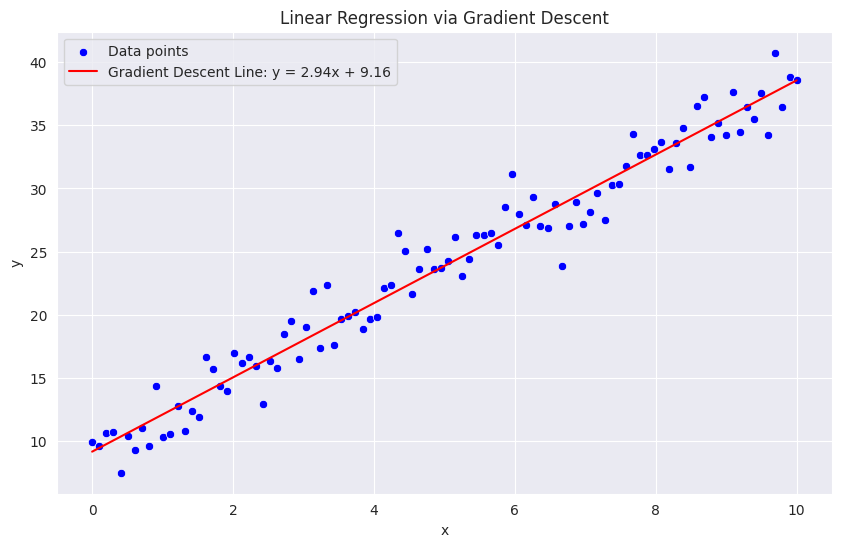

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, label='Data points', color='blue')
plt.plot(x, k_hat * x + b_hat, color='red', label=f'Gradient Descent Line: y = {k_hat:.2f}x + {b_hat:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression via Gradient Descent')
plt.legend()
plt.show()

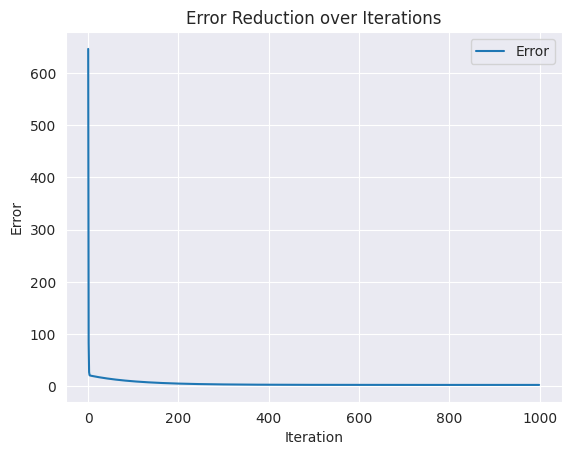

In [ ]:
plt.plot(errors, label='Error')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error Reduction over Iterations')
plt.legend()
plt.show()